In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tools import add_constant

link to data source for county and sector stuff 
* https://data.census.gov/cedsci/table?g=0100000US.050000&d=ANN%20Business%20Patterns%20County%20Business%20Patterns&tid=CBP2018.CB1800CBP&hidePreview=true
* https://www.census.gov/data/datasets/2018/econ/cbp/2018-cbp.html

In [3]:
sector_data = pd.read_csv("CBP2018.CB1800CBP_data_with_overlays_2020-10-29T122511.csv")


C:\Users\yizho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Types of Sectors
sector_data['NAICS2017_LABEL'].unique()

array(['Meaning of NAICS code', 'Total for all sectors',
       'Agriculture, forestry, fishing and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance and insurance', 'Real estate and rental and leasing',
       'Professional, scientific, and technical services',
       'Administrative and support and waste management and remediation services',
       'Educational services', 'Health care and social assistance',
       'Arts, entertainment, and recreation',
       'Accommodation and food services',
       'Other services (except public administration)',
       'Management of companies and enterprises',
       'Industries not classified'], dtype=object)

In [5]:
temp = sector_data[sector_data['EMPSZES_LABEL'] == 'All establishments']
temp['EMP'].value_counts()

13       298
7        295
10       288
16       280
8        280
        ... 
14194      1
4341       1
11187      1
73515      1
20656      1
Name: EMP, Length: 9966, dtype: int64

In [6]:
temp2 = temp[temp['NAICS2017_LABEL'] == 'Total for all sectors']
temp2 = temp2[['GEO_ID','EMP','PAYANN']]
temp2

,GEO_ID,EMP,PAYANN
1,0500000US01001,11397,373865
75,0500000US01003,64354,2212640
190,0500000US01005,6980,248131
248,0500000US01007,3519,145171
304,0500000US01009,6673,219763
...,...,...,...
225603,0500000US72151,1487,28810
225634,0500000US72153,4040,79006
225687,0500000US78010,10503,421174
225770,0500000US78020,1504,59440


In [9]:
temp3 = pd.merge(temp, temp2, on='GEO_ID')

temp3['Employement_%'] = (temp3['EMP_x'].astype('int64') / temp3['EMP_y'].astype('int64') * 100)

In [10]:

temp4 = temp3[temp3['NAICS2017_LABEL'].isin(['Accommodation and food services',
                                     'Finance and insurance',
                                     'Health care and social assistance',
                                     'Manufacturing', 
                                     'Real estate and rental and leasing',
                                     'Retail trade', 
                                     'Transportation and warehousing'])]
temp01 = temp4.groupby('NAME').sum()

In [11]:
df = temp01.sort_values('Employement_%',ascending=False)
temp6 = pd.merge(temp[temp['NAICS2017_LABEL']=='Total for all sectors'][['NAME','EMP']],df,on='NAME')

In [12]:
temp6['EMP'] = temp6['EMP'].astype('int64')


In [13]:
temp6.sort_values(['EMP','Employement_%'], ascending=False)

,NAME,EMP,Employement_%
204,"Los Angeles County, California",3869073,56.779337
608,"Cook County, Illinois",2413447,57.800565
1849,"New York County, New York",2276786,46.591116
2613,"Harris County, Texas",2057494,52.024890
103,"Maricopa County, Arizona",1748608,59.461297
...,...,...,...
2730,"Terrell County, Texas",49,44.897959
1698,"Keya Paha County, Nebraska",44,43.181818
1704,"Loup County, Nebraska",43,34.883721
1797,"Harding County, New Mexico",36,41.666667


In [14]:
#temp6[temp6['EMP'] > 100000]
import numpy as np
cutoff = np.percentile(temp6['EMP'],99)

In [20]:
top_counties = temp6[temp6['EMP'] >= cutoff].sort_values('Employement_%',ascending=False).head(20)
top_counties

,NAME,EMP,Employement_%
1842,"Kings County, New York",655714,68.003123
1740,"Clark County, Nevada",879628,66.577917
221,"San Bernardino County, California",617828,65.889536
1310,"Wayne County, Michigan",659107,65.137527
2728,"Tarrant County, Texas",805016,62.261868
2058,"Franklin County, Ohio",664545,60.768195
2051,"Cuyahoga County, Ohio",667707,60.481918
362,"Miami-Dade County, Florida",1000931,60.021220
2528,"Bexar County, Texas",768295,59.583623
103,"Maricopa County, Arizona",1748608,59.461297


In [18]:
summary = pd.read_csv('SIR_summary.csv')
summary_dictionary = {
    "Kings County, New York":"Kings New York",
    "Clark County, Nevada":"Clark Nevada",
    "San Bernardino County, California":"San Bernardino California",
    "Wayne County, Michigan":"Wayne Michigan",
    "Tarrant County, Texas":"Tarrant Texas",
    "Franklin County, Ohio":"Franklin Ohio",
    "Cuyahoga County, Ohio":"Cuyahoga Ohio",
    "Miami-Dade County, Florida":"Miami-Dade Florida",
    "Bexar County, Texas":"Bexar Texas",
    "Maricopa County, Arizona":"Maricopa Arizona",
    "Cook County, Illinois":"Cook Illinois",
    "Los Angeles County, California":"Los Angeles California",
    "Philadelphia County, Pennsylvania":"Philadelphia Pennsylvania",
    "San Diego County, California":"San Diego California",
    "Suffolk County, Massachusetts":"Suffolk Massachusetts",
    "Broward County, Florida":"Broward Florida",
    "Hennepin County, Minnesota":"Hennepin Minnesota",
    "Allegheny County, Pennsylvania":"Allegheny Pennsylvania",
    "Alameda County, California":"Alameda California",
    "Orange County, California":"Orange California"
}
summary

,County,1Y Prediction,2Y Prediction,5Y Prediction,Infected Proportion,Last # of Infected
0,Kings New York,8.342923e+05,1.883305e+05,2.131187e+03,0.029602,75779
1,Clark Nevada,1.826728e+06,1.386110e+06,6.053906e+05,0.036036,81684
2,San Bernardino California,1.817524e+06,1.434344e+06,7.047608e+05,0.029525,64367
3,Wayne Michigan,5.523509e+05,1.290334e+05,1.640938e+03,0.023855,41731
4,Tarrant Texas,1.767847e+06,1.423121e+06,7.423578e+05,0.031776,66810
5,Franklin Ohio,1.074017e+06,8.097357e+05,3.464398e+05,0.025713,33858
6,Cuyahoga Ohio,9.870177e+05,6.901341e+05,2.297468e+05,0.017218,21266
7,Miami-Dade Florida,2.314818e+06,1.892299e+06,1.031851e+06,0.068294,185552
8,Bexar Texas,1.588545e+06,1.174503e+06,4.744527e+05,0.032742,65600
9,Maricopa Arizona,3.392408e+06,2.391773e+06,8.380693e+05,0.035165,157728


In [26]:
top_counties['infected_proportion'] = 0
for key in summary_dictionary:
    infected = summary.loc[summary['County'] == summary_dictionary[key],'Infected Proportion'].values[0]
    
    top_counties.loc[top_counties['NAME'] == key,'infected_proportion'] = infected
top_counties

,NAME,EMP,Employement_%,infected_proportion
1842,"Kings County, New York",655714,68.003123,0.029602
1740,"Clark County, Nevada",879628,66.577917,0.036036
221,"San Bernardino County, California",617828,65.889536,0.029525
1310,"Wayne County, Michigan",659107,65.137527,0.023855
2728,"Tarrant County, Texas",805016,62.261868,0.031776
2058,"Franklin County, Ohio",664545,60.768195,0.025713
2051,"Cuyahoga County, Ohio",667707,60.481918,0.017218
362,"Miami-Dade County, Florida",1000931,60.021220,0.068294
2528,"Bexar County, Texas",768295,59.583623,0.032742
103,"Maricopa County, Arizona",1748608,59.461297,0.035165


Text(0, 0.5, 'Proportion of population infected')

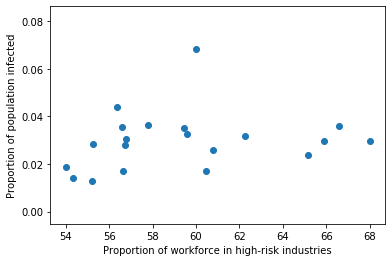

In [29]:
plt.scatter(top_counties['Employement_%'],top_counties['infected_proportion'])
plt.xlabel("Proportion of workforce in high-risk industries")
plt.ylabel("Proportion of population infected")

In [34]:
from statsmodels.api import OLS
y = top_counties['infected_proportion'].values.reshape(-1,1)
X = top_counties['Employement_%'].values.reshape(-1, 1)
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              123.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                    9.71e-10
Time:                        09:50:22   Log-Likelihood:                          60.504
No. Observations:                  20   AIC:                                     -119.0
Df Residuals:                      19   BIC:                                     -118.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005   4.53e-05     11.089      0.000       0.000       0.001
==============================================================================
Omnibus:                       15.745   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.032
Skew:                           1.538   Prob(JB):                     0.000330
Kurtosis:                       6.127   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
covid_dictionary = {
    "Kings County, New York":"Kings",
    "Clark County, Nevada":"Clark",
    "San Bernardino County, California":"San Bernardino",
    "Wayne County, Michigan":"Wayne",
    "Tarrant County, Texas":"Tarrant",
    "Franklin County, Ohio":"Franklin",
    "Cuyahoga County, Ohio":"Cuyahoga",
    "Miami-Dade County, Florida":"Miami-Dade",
    "Bexar County, Texas":"Bexar",
    "Maricopa County, Arizona":"Maricopa",
    "Cook County, Illinois":"Cook",
    "Los Angeles County, California":"Los Angeles",
    "Philadelphia County, Pennsylvania":"Philadelphia",
    "San Diego County, California":"San Diego",
    "Suffolk County, Massachusetts":"Suffolk",
    "Broward County, Florida":"Broward",
    "Hennepin County, Minnesota":"Hennepin",
    "Allegheny County, Pennsylvania":"Allegheny",
    "Alameda County, California":"Alameda",
    "Orange County, California":"Orange"
}

ue_dictionary = {
    "Kings County, New York":"NYKING7URN.csv",
    "Clark County, Nevada":"NVCLAR3URN.csv",
    "San Bernardino County, California":"CASANB1URN.csv",
    "Wayne County, Michigan":"MIWAYN3URN.csv",
    "Tarrant County, Texas":"TXTARR9URN.csv",
    "Franklin County, Ohio":"OHFRAN0URN.csv",
    "Cuyahoga County, Ohio":"OHCUYA5URN.csv",
    "Miami-Dade County, Florida":"FLMIAM6URN.csv",
    "Bexar County, Texas":"TXBEXA9URN.csv",
    "Maricopa County, Arizona":"AZMARI3URN.csv",
    "Cook County, Illinois":"ILCOOK1URN.csv",
    "Los Angeles County, California":"CALOSA7URN.csv",
    "Philadelphia County, Pennsylvania":"PAPHIL5URN.csv",
    "San Diego County, California":"CASAND5URN.csv",
    "Suffolk County, Massachusetts":"MASUFF5URN.csv",
    "Broward County, Florida":"FLBROW5URN.csv",
    "Hennepin County, Minnesota":"MNHENN3URN.csv",
    "Allegheny County, Pennsylvania":"PAALLE3URN.csv",
    "Alameda County, California":"CAALAM1URN.csv",
    "Orange County, California":"CAORAN7URN.csv"
}



In [14]:
master = pd.DataFrame(columns=['DATE'])

for county,file in zip(ue_dictionary.keys(),ue_dictionary.values()):
    temp = pd.read_csv('unemployment_data/'+file)
    column_name = file.split('.')[0]
    temp = temp.rename(columns={column_name: "ue_rate"})
    temp['County'] = county
    if master.empty == True:
        master = temp
    else:
        master = master.append(temp,ignore_index=True)

master.reset_index(inplace=True)


In [15]:
master['DATE'] = pd.to_datetime(master['DATE'])

master = master[master['DATE'] >= pd.to_datetime('2020-01-01')]

In [16]:
master

,index,DATE,ue_rate,County
4,4,2020-01-01,3.6,"Kings County, New York"
5,5,2020-02-01,3.5,"Kings County, New York"
6,6,2020-03-01,4.2,"Kings County, New York"
7,7,2020-04-01,14.7,"Kings County, New York"
8,8,2020-05-01,18.2,"Kings County, New York"
...,...,...,...,...
7019,7019,2020-05-01,14.7,"Orange County, California"
7020,7020,2020-06-01,13.6,"Orange County, California"
7021,7021,2020-07-01,12.4,"Orange County, California"
7022,7022,2020-08-01,9.5,"Orange County, California"


In [17]:
vocid = pd.read_csv('cleaned_jhu_data.csv')

In [18]:
vocid = vocid.rename(columns={'Unnamed: 0':'DATE'})
vocid['DATE'] = pd.to_datetime(vocid['DATE']);

In [19]:
vocid = vocid.groupby(vocid['DATE'].dt.month).sum().diff()

In [20]:
temp1 = vocid[['Kings New York Cases', 'Kings New York Deaths']]
vocid

,Kings New York Cases,Kings New York Deaths,Clark Nevada Cases,Clark Nevada Deaths,San Bernardino California Cases,San Bernardino California Deaths,Wayne Michigan Cases,Wayne Michigan Deaths,Tarrant Texas Cases,Tarrant Texas Deaths,...,Broward Florida Cases,Broward Florida Deaths,Hennepin Minnesota Cases,Hennepin Minnesota Deaths,Allegheny Pennsylvania Cases,Allegheny Pennsylvania Deaths,Alameda California Cases,Alameda California Deaths,Orange California Cases,Orange California Deaths
DATE,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0
3,71498.0,2894.0,4609.0,101.0,629.0,19.0,18604.0,520.0,1378.0,14.0,...,6920.0,71.0,1563.0,14.0,1734.0,19.0,2224.0,37.0,3246.0,24.0
4,855382.0,85985.0,72852.0,3259.0,31292.0,1322.0,343096.0,29332.0,31608.0,944.0,...,93687.0,2937.0,21741.0,2254.0,25499.0,1167.0,27519.0,932.0,39695.0,753.0
5,668425.0,89481.0,87488.0,5474.0,77021.0,3152.0,236847.0,41526.0,91583.0,2631.0,...,90981.0,5263.0,131515.0,11484.0,22645.0,3055.0,44860.0,1523.0,89127.0,2171.0
6,147661.0,33841.0,123336.0,2624.0,136302.0,2408.0,58149.0,8642.0,115292.0,2304.0,...,111067.0,2424.0,151894.0,7644.0,14999.0,994.0,61742.0,911.0,146126.0,4138.0
7,151225.0,10704.0,566559.0,4774.0,434796.0,3197.0,109648.0,5679.0,378975.0,3023.0,...,797875.0,4722.0,136985.0,3288.0,108794.0,1086.0,131197.0,1505.0,546678.0,7415.0
8,82678.0,2141.0,759782.0,12131.0,573753.0,8168.0,137020.0,2373.0,457352.0,6524.0,...,927452.0,14515.0,188513.0,1641.0,116021.0,2079.0,196693.0,1950.0,509588.0,10540.0
9,23547.0,-5778.0,282461.0,10150.0,289555.0,7058.0,102567.0,149.0,285297.0,4671.0,...,216942.0,8860.0,126891.0,961.0,51831.0,1769.0,139067.0,3568.0,204049.0,8433.0


County | DATE | UE_Rate | covid_cases | covid_deaths

In [21]:
vocid.to_csv('covid_aggr.csv')
master.to_csv('ue_data.csv')

In [22]:
vocid

,Kings New York Cases,Kings New York Deaths,Clark Nevada Cases,Clark Nevada Deaths,San Bernardino California Cases,San Bernardino California Deaths,Wayne Michigan Cases,Wayne Michigan Deaths,Tarrant Texas Cases,Tarrant Texas Deaths,...,Broward Florida Cases,Broward Florida Deaths,Hennepin Minnesota Cases,Hennepin Minnesota Deaths,Allegheny Pennsylvania Cases,Allegheny Pennsylvania Deaths,Alameda California Cases,Alameda California Deaths,Orange California Cases,Orange California Deaths
DATE,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0
3,71498.0,2894.0,4609.0,101.0,629.0,19.0,18604.0,520.0,1378.0,14.0,...,6920.0,71.0,1563.0,14.0,1734.0,19.0,2224.0,37.0,3246.0,24.0
4,855382.0,85985.0,72852.0,3259.0,31292.0,1322.0,343096.0,29332.0,31608.0,944.0,...,93687.0,2937.0,21741.0,2254.0,25499.0,1167.0,27519.0,932.0,39695.0,753.0
5,668425.0,89481.0,87488.0,5474.0,77021.0,3152.0,236847.0,41526.0,91583.0,2631.0,...,90981.0,5263.0,131515.0,11484.0,22645.0,3055.0,44860.0,1523.0,89127.0,2171.0
6,147661.0,33841.0,123336.0,2624.0,136302.0,2408.0,58149.0,8642.0,115292.0,2304.0,...,111067.0,2424.0,151894.0,7644.0,14999.0,994.0,61742.0,911.0,146126.0,4138.0
7,151225.0,10704.0,566559.0,4774.0,434796.0,3197.0,109648.0,5679.0,378975.0,3023.0,...,797875.0,4722.0,136985.0,3288.0,108794.0,1086.0,131197.0,1505.0,546678.0,7415.0
8,82678.0,2141.0,759782.0,12131.0,573753.0,8168.0,137020.0,2373.0,457352.0,6524.0,...,927452.0,14515.0,188513.0,1641.0,116021.0,2079.0,196693.0,1950.0,509588.0,10540.0
9,23547.0,-5778.0,282461.0,10150.0,289555.0,7058.0,102567.0,149.0,285297.0,4671.0,...,216942.0,8860.0,126891.0,961.0,51831.0,1769.0,139067.0,3568.0,204049.0,8433.0


In [23]:
master_new = pd.read_csv('master.csv')

In [24]:
master_new

,DATE,ue_rate,County,covid_cases,covid_deaths,diff_covid_cases,diff_covid_deaths
0,2020-01-01,3.6,"Kings County, New York",0,0,0,0
1,2020-02-01,3.5,"Kings County, New York",0,0,0,0
2,2020-03-01,4.2,"Kings County, New York",11917,662,11917,662
3,2020-04-01,14.7,"Kings County, New York",44872,4521,32955,3859
4,2020-05-01,18.2,"Kings County, New York",55900,6926,11028,2405
...,...,...,...,...,...,...,...
175,2020-05-01,14.7,"Orange County, California",6261,147,3868,102
176,2020-06-01,13.6,"Orange County, California",13843,340,7582,193
177,2020-07-01,12.4,"Orange County, California",36196,618,22353,278
178,2020-08-01,9.5,"Orange County, California",48538,980,12342,362


No handles with labels found to put in legend.


Text(0.5, 0, 'Log(Net New Covid Cases)')

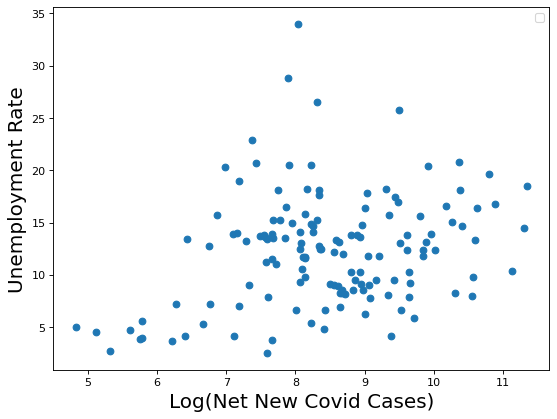

In [25]:
master_new = master_new[master_new['covid_cases']>2]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(np.log(master_new['diff_covid_cases']),master_new['ue_rate'])
plt.legend()
plt.ylabel('Unemployment Rate', fontsize=18)
plt.xlabel('Log(Net New Covid Cases)', fontsize=18)

## Model Building

In [26]:
from sklearn.linear_model import LinearRegression
from statsmodels.tools import add_constant

In [27]:
counties = ['Kings County, New York', 'Clark County, Nevada',
       'San Bernardino County, California', 'Wayne County, Michigan',
       'Tarrant County, Texas', 'Franklin County, Ohio',
       'Cuyahoga County, Ohio', 'Miami-Dade County, Florida',
       'Bexar County, Texas', 'Maricopa County, Arizona',
       'Cook County, Illinois', 'Los Angeles County, California',
       'Philadelphia County, Pennsylvania',
       'San Diego County, California', 'Suffolk County, Massachusetts',
       'Broward County, Florida', 'Hennepin County, Minnesota',
       'Allegheny County, Pennsylvania', 'Alameda County, California',
       'Orange County, California']

results = {}
for i in counties:
    temp = master_new[master_new['County'] == i]
    result_list = []
    for j in range(100):
        temp_boot =  temp.sample(len(temp), replace=True)
        y = temp_boot.ue_rate
        x = np.log(temp_boot.diff_covid_cases)
        #x = temp.diff_covid_cases
        X = add_constant(x)
    
        reg = LinearRegression().fit(X, y)
    
        rsquared = reg.score(X,y)
        result_list.append(rsquared)
    
    results[i] = sum(result_list) / len(result_list)
    

In [28]:
results

{'Kings County, New York': 0.2989005967188472,
 'Clark County, Nevada': 0.34239521259783273,
 'San Bernardino County, California': 0.46987554128281844,
 'Wayne County, Michigan': 0.2908876153230552,
 'Tarrant County, Texas': 0.389822850328116,
 'Franklin County, Ohio': 0.6438992492397857,
 'Cuyahoga County, Ohio': 0.2725835652588067,
 'Miami-Dade County, Florida': 0.48115062845941325,
 'Bexar County, Texas': 0.346433697733142,
 'Maricopa County, Arizona': 0.2783921940661422,
 'Cook County, Illinois': 0.6156014885869546,
 'Los Angeles County, California': 0.5253072838094205,
 'Philadelphia County, Pennsylvania': 0.4761950039091068,
 'San Diego County, California': 0.45600517341286034,
 'Suffolk County, Massachusetts': 0.17428929786060898,
 'Broward County, Florida': 0.27538290401695636,
 'Hennepin County, Minnesota': 0.6002233971541893,
 'Allegheny County, Pennsylvania': 0.2089733096850369,
 'Alameda County, California': 0.48472466291503985,
 'Orange County, California': 0.3778279328386

In [29]:
predline = reg.predict(X)

No handles with labels found to put in legend.


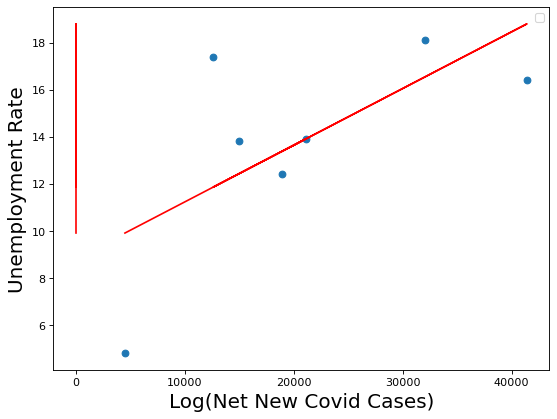

In [30]:
temp = master_new[master_new['County'] == 'Cook County, Illinois']

y = temp.ue_rate
x = temp.diff_covid_cases
X = add_constant(x)

reg = LinearRegression().fit(X, y)

predline = reg.predict(X)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(temp['diff_covid_cases'],temp['ue_rate'])
plt.legend()
plt.ylabel('Unemployment Rate', fontsize=18)
plt.xlabel('Log(Net New Covid Cases)', fontsize=18)


plt.plot(X, predline, c= "red")

#plt.gca().invert_yaxis()
plt.show()

In [31]:
reg.score(X,y)

0.4406140680784776

In [32]:
master_new['County'].unique()

array(['Kings County, New York', 'Clark County, Nevada',
       'San Bernardino County, California', 'Wayne County, Michigan',
       'Tarrant County, Texas', 'Franklin County, Ohio',
       'Cuyahoga County, Ohio', 'Miami-Dade County, Florida',
       'Bexar County, Texas', 'Maricopa County, Arizona',
       'Cook County, Illinois', 'Los Angeles County, California',
       'Philadelphia County, Pennsylvania',
       'San Diego County, California', 'Suffolk County, Massachusetts',
       'Broward County, Florida', 'Hennepin County, Minnesota',
       'Allegheny County, Pennsylvania', 'Alameda County, California',
       'Orange County, California'], dtype=object)